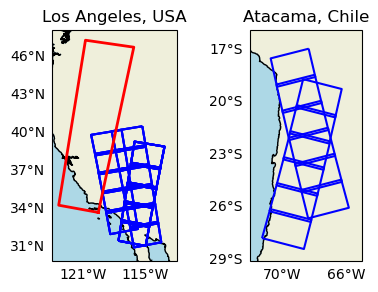

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

# 加载第一个地图的GeoJSON文件
gdf_a1 = gpd.read_file('data/loa_a064.geojson')
gdf_b1 = gpd.read_file('data/loa_a166.geojson')
gdf_c1 = gpd.read_file('data/loa_d173.geojson')

# 加载第二个地图的GeoJSON文件
gdf_a2 = gpd.read_file('data/chi_a169.geojson')
gdf_b2 = gpd.read_file('data/chi_d156.geojson')

# 创建一个图形和两个子图，使用Cartopy的地图投影
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), subplot_kw={'projection': ccrs.PlateCarree()})

# 设置各自地图的显示范围
ax1.set_extent([-124, -112, 29.9, 48.1])
ax2.set_extent([-72, -65, -29.1, -15.9])

# 添加海岸线和陆地
for ax in [ax1, ax2]:
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, edgecolor='#add8e6')
    ax.add_feature(cfeature.OCEAN, facecolor='#add8e6')

# 绘制每个GeoJSON文件的边界
for ax, gdf_list in zip([ax1, ax2], [[gdf_a1, gdf_b1, gdf_c1], [gdf_a2, gdf_b2]]):
    for gdf in gdf_list:
        gdf.boundary.plot(ax=ax, color='blue')

# 设置标题
ax1.set_title('Los Angeles, USA')
ax2.set_title('Atacama, Chile')

# 数据覆盖范围的线和图
x = [-119.54, -116.12, -120.78, -123.36, -119.54]
y = [33.73, 46.75, 47.30, 34.30, 33.73]
ax1.plot(x, y, color='red', linewidth=2)

# 调整刻度朝向内侧
ax1.tick_params(direction='in', which='both', top=False, right=False, color='black')
ax2.tick_params(direction='in', which='both', top=False, right=False, color='black')

# 显示网格线，仅在下行和右列显示坐标
gl1 = ax1.gridlines(draw_labels=True,linestyle='',alpha=0.0001)
gl1.xlocator = mticker.FixedLocator(range(-121, -111, 2))
gl1.ylocator = mticker.FixedLocator(range(28, 50, 3))
gl1.top_labels = False
gl1.right_labels = False

# 显示网格线，仅在下行和右列显示坐标
gl2 = ax2.gridlines(draw_labels=True,linestyle='',alpha=0.0001)
gl2.xlocator = mticker.FixedLocator(range(-72, -64, 2))
gl2.ylocator = mticker.FixedLocator(range(-29, -15, 3))
gl2.top_labels = False
gl2.right_labels = False

# 调整subplot之间的间距
plt.subplots_adjust(wspace=-0.3)
fig.savefig('pic/study_area.png', bbox_inches='tight', transparent=True, dpi=600)

# 显示图形
plt.show()

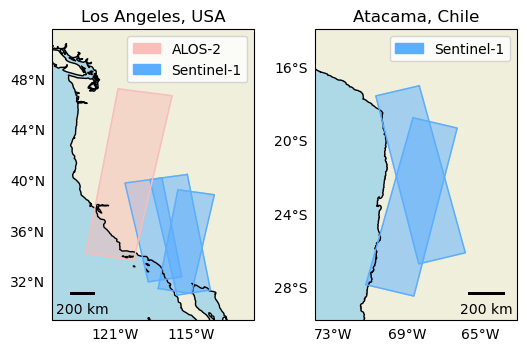

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.patches as mpatches

# 加载第一个地图的GeoJSON文件
gdf_a1 = gpd.read_file('data/loa_a064.geojson')
gdf_b1 = gpd.read_file('data/loa_a166.geojson')
gdf_c1 = gpd.read_file('data/loa_d173.geojson')

# 加载第二个地图的GeoJSON文件
gdf_a2 = gpd.read_file('data/chi_a169.geojson')
gdf_b2 = gpd.read_file('data/chi_d156.geojson')

# 创建一个图形和两个子图，使用Cartopy的地图投影
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# 设置各自地图的显示范围
ax1.set_extent([-126, -110, 29, 52])
ax2.set_extent([-74, -63, -29.715,-13.9])

# 添加海岸线和陆地
for ax in [ax1, ax2]:
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, edgecolor='#add8e6')
    ax.add_feature(cfeature.OCEAN, facecolor='#add8e6')

i = 0 # 选择的整数i
stride = 5  # 步长
for ax, gdf_list in zip([ax1, ax2], [[gdf_a1, gdf_b1, gdf_c1], [gdf_a2, gdf_b2]]):
    for gdf in gdf_list:
        all_lon = []
        all_lat = []
        for geom in gdf.geometry:
            if geom.geom_type == 'Polygon':
                lon, lat = geom.exterior.xy
                all_lon.extend(lon)
                all_lat.extend(lat)
            elif geom.geom_type == 'MultiPolygon':
                for poly in geom:
                    lon, lat = poly.exterior.xy
                    all_lon.extend(lon)
                    all_lat.extend(lat)
        rightup_lon = all_lon[0]
        rightdown_lon = all_lon[len(all_lon)-4]
        leftdown_lon = all_lon[len(all_lon)-3]
        leftup_lon = all_lon[3]
        rightup_lat = all_lat[0]
        rightdown_lat = all_lat[len(all_lat)-4]
        leftdown_lat = all_lat[len(all_lat)-3]
        leftup_lat = all_lat[3]
        x = [rightup_lon, rightdown_lon, leftdown_lon, leftup_lon, rightup_lon]
        y = [rightup_lat, rightdown_lat, leftdown_lat, leftup_lat, rightup_lat]
        ax.plot(x, y, color='#5BAEFF', linewidth=1)
        ax.fill(x, y, color='#5BAEFF', alpha=0.5)

# 设置标题
ax1.set_title('Los Angeles, USA')
ax2.set_title('Atacama, Chile')

# 数据覆盖范围的线和图
x = [-119.54, -116.5, -120.78, -123.3, -119.54]
y = [33.73, 46.75, 47.30, 34.30, 33.73]
ax1.plot(x, y, color='#F9BEB9', linewidth=1)
ax1.fill(x, y, color='#F9BEB9', alpha=0.5)

# 调整刻度朝向内侧
ax1.tick_params(direction='in')
ax2.tick_params(direction='in')

# 显示网格线，仅在下行和右列显示坐标
gl1 = ax1.gridlines(draw_labels=True,linestyle='',alpha=0.0001)
gl1.xlocator = mticker.FixedLocator(range(-121, -108, 3))
gl1.ylocator = mticker.FixedLocator(range(28, 50, 4))
gl1.top_labels = False
gl1.right_labels = False

# 显示网格线，仅在下行和右列显示坐标
gl2 = ax2.gridlines(draw_labels=True,linestyle='',alpha=0.0001)
gl2.xlocator = mticker.FixedLocator(range(-73, -63, 2))
gl2.ylocator = mticker.FixedLocator(range(-28, -12, 4))
gl2.top_labels = False
gl2.right_labels = False

# Add scale bars to your axes individually
scalebar1 = ScaleBar(100e3, location='lower left', frameon=False)  
scalebar2 = ScaleBar(100e3, location='lower right', frameon=False)
ax1.add_artist(scalebar1)
ax2.add_artist(scalebar2)

pink_patch = mpatches.Patch(color='#F9BEB9', label='ALOS-2')
blue_patch = mpatches.Patch(color='#5BAEFF', label='Sentinel-1')
ax1.legend(handles=[pink_patch, blue_patch], loc='upper right', prop={'size': 10})
ax2.legend(handles=[blue_patch], loc='upper right', prop={'size': 10})

# 调整subplot之间的间距
plt.subplots_adjust(wspace=0.3)
fig.savefig('pdf/study_area.pdf', bbox_inches='tight', transparent=True, dpi=600)

# 显示图形
plt.show()

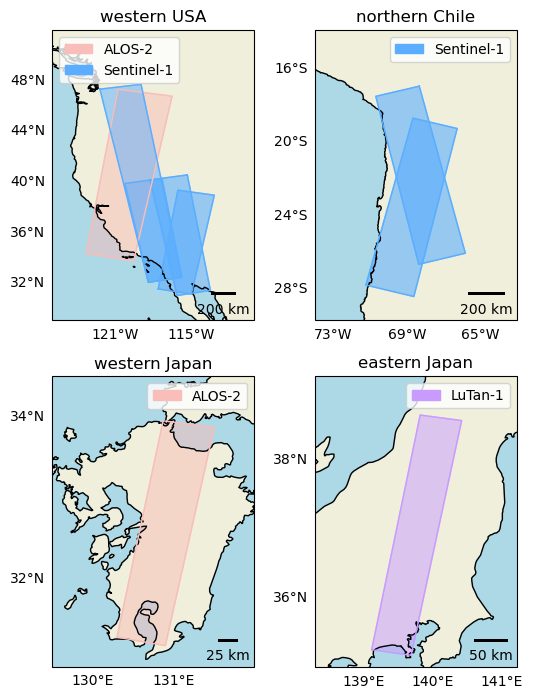

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.patches as mpatches

# 加载第一个地图的GeoJSON文件
gdf_a1 = gpd.read_file('data/loa_a064.geojson')
gdf_b1 = gpd.read_file('data/loa_a166.geojson')
gdf_c1 = gpd.read_file('data/loa_d173.geojson')

# 加载第二个地图的GeoJSON文件
gdf_a2 = gpd.read_file('data/chi_a169.geojson')
gdf_b2 = gpd.read_file('data/chi_d156.geojson')

fig, axes = plt.subplots(2, 2, figsize=(6, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax1, ax2, ax3, ax4 = axes.flatten()

# 设置各自地图的显示范围
ax1.set_extent([-126, -110, 29, 52])
ax2.set_extent([-74, -63, -29.715,-13.9])
ax3.set_extent([129.5,132, 30.91, 34.5])
ax4.set_extent([138.3, 141.22, 35,39.2])

# 添加海岸线和陆地
for ax in [ax1, ax2,ax3,ax4]:
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, edgecolor='#add8e6')
    ax.add_feature(cfeature.OCEAN, facecolor='#add8e6')

i = 0 # 选择的整数i
stride = 5  # 步长
for ax, gdf_list in zip([ax1, ax2], [[gdf_a1, gdf_b1, gdf_c1], [gdf_a2, gdf_b2]]):
    for gdf in gdf_list:
        all_lon = []
        all_lat = []
        for geom in gdf.geometry:
            if geom.geom_type == 'Polygon':
                lon, lat = geom.exterior.xy
                all_lon.extend(lon)
                all_lat.extend(lat)
            elif geom.geom_type == 'MultiPolygon':
                for poly in geom:
                    lon, lat = poly.exterior.xy
                    all_lon.extend(lon)
                    all_lat.extend(lat)
        rightup_lon = all_lon[0]
        rightdown_lon = all_lon[len(all_lon)-4]
        leftdown_lon = all_lon[len(all_lon)-3]
        leftup_lon = all_lon[3]
        rightup_lat = all_lat[0]
        rightdown_lat = all_lat[len(all_lat)-4]
        leftdown_lat = all_lat[len(all_lat)-3]
        leftup_lat = all_lat[3]
        x = [rightup_lon, rightdown_lon, leftdown_lon, leftup_lon, rightup_lon]
        y = [rightup_lat, rightdown_lat, leftdown_lat, leftup_lat, rightup_lat]
        ax.plot(x, y, color='#5BAEFF', linewidth=1)
        ax.fill(x, y, color='#5BAEFF', alpha=0.6)

# 设置标题
ax1.set_title('western USA')
ax2.set_title('northern Chile')
ax3.set_title('western Japan')
ax4.set_title('eastern Japan')

# cunren liang - alos2-scansar
x = [-119.54, -116.5, -120.78, -123.3, -119.54]
y = [33.73, 46.75, 47.30, 34.30, 33.73]
ax1.plot(x, y, color='#F9BEB9', linewidth=1)
ax1.fill(x, y, color='#F9BEB9', alpha=0.5)

# yidi wang - sentinel-1
x1 = [-122.2165 ,-118.3796 ,-115.7264 ,-118.9552 ,-122.2165 ]
y1 = [47.3063, 32.0225, 32.4059, 47.689, 47.3063]
ax1.plot(x1, y1, color='#5BAEFF', linewidth=1)
ax1.fill(x1, y1, color='#5BAEFF', alpha=0.5)

# Yosuke Aoki - alos2-stripmap
x1 = [130.873 ,130.3024 ,130.9009 ,131.5056 ,130.873]
y1 = [33.9525, 31.2757, 31.1723, 33.8702, 33.9525]
ax3.plot(x1, y1, color='#F9BEB9', linewidth=1)
ax3.fill(x1, y1, color='#F9BEB9', alpha=0.5)

# changyang hu - lutan-1-stripmap
x2 = [139.12,139.69, 140.42, 139.82, 139.12]
y2 = [35.25,35.17, 38.56, 38.64,35.25]
ax4.plot(x2, y2, color='#C99BFF', linewidth=1)
ax4.fill(x2, y2, color='#C99BFF', alpha=0.5)

# 调整刻度朝向内侧
ax1.tick_params(direction='in')
ax2.tick_params(direction='in')
ax3.tick_params(direction='in')
ax4.tick_params(direction='in')

# 显示网格线，仅在下行和右列显示坐标
gl1 = ax1.gridlines(draw_labels=True,linestyle='',alpha=0.0001)
gl1.xlocator = mticker.FixedLocator(range(-121, -108, 3))
gl1.ylocator = mticker.FixedLocator(range(28, 50, 4))
gl1.top_labels = False
gl1.right_labels = False

# 显示网格线，仅在下行和右列显示坐标
gl2 = ax2.gridlines(draw_labels=True,linestyle='',alpha=0.0001)
gl2.xlocator = mticker.FixedLocator(range(-73, -63, 2))
gl2.ylocator = mticker.FixedLocator(range(-28, -12, 4))
gl2.top_labels = False
gl2.right_labels = False

# 显示网格线，仅在下行和右列显示坐标
gl3 = ax3.gridlines(draw_labels=True,linestyle='',alpha=0.0001)
gl3.xlocator = mticker.FixedLocator(range(129,132, 1))
gl3.ylocator = mticker.FixedLocator(range(30, 35,2))
gl3.top_labels = False
gl3.right_labels = False

# 显示网格线，仅在下行和右列显示坐标
gl4 = ax4.gridlines(draw_labels=True,linestyle='',alpha=0.0001)
gl4.xlocator = mticker.FixedLocator(range(138, 142, 1))
gl4.ylocator = mticker.FixedLocator(range(30,39,2))
gl4.top_labels = False
gl4.right_labels = False

# Add scale bars to your axes individually
scalebar1 = ScaleBar(100e3, location='lower right', frameon=False)  
scalebar2 = ScaleBar(100e3, location='lower right', frameon=False)
scalebar3 = ScaleBar(100e3, location='lower right', frameon=False)
scalebar4 = ScaleBar(100e3, location='lower right', frameon=False)
ax1.add_artist(scalebar1)
ax2.add_artist(scalebar2)
ax3.add_artist(scalebar3)
ax4.add_artist(scalebar4)

pink_patch = mpatches.Patch(color='#F9BEB9', label='ALOS-2')
blue_patch = mpatches.Patch(color='#5BAEFF', label='Sentinel-1')
pur_patch = mpatches.Patch(color='#C99BFF', label='LuTan-1')
ax1.legend(handles=[pink_patch, blue_patch], loc='upper left', prop={'size': 10})
ax2.legend(handles=[blue_patch], loc='upper right', prop={'size': 10})
ax3.legend(handles=[pink_patch], loc='upper right', prop={'size': 10})
ax4.legend(handles=[pur_patch], loc='upper right', prop={'size': 10})

# 调整subplot之间的间距
plt.subplots_adjust(wspace=0.3, hspace = -0.4)
fig.savefig('pdf/study_area.pdf', bbox_inches='tight', transparent=True, dpi=600)

# 显示图形
plt.show()